In [18]:
#Fig 5E
#1. use theoretical speed instead of emperical speed. HeatMap: tau=9: with the widest range
#2. HeatMap tau=18: best agreement.
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
col_vec1= np.zeros( (100, 4) )
col_vec1[:, 1]= np.linspace(0.1, 1, 100)
col_vec1[:, 3]= 1

col_vec2= np.zeros( (100, 4) )
col_vec2[:, 0]= np.linspace(0.1, 1, 100)
col_vec2[:, 1]= col_vec2[:, 0]*165/255
col_vec2[:, 3]= 1

col_map1 = ListedColormap(col_vec1)
col_map2 = ListedColormap(col_vec2)

In [19]:
import numpy as np    
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation 
from matplotlib import cm
from numpy.random import randn
import seaborn


phis= [i/100  for i in range( 68, 101, 2 ) ]
rhos= [i/100 for i in range(82, 101, 2)]
delta=10**(-10);
tau=9
DPhi=0.02

ColMap=np.array([ [0, 1, 0], 
                 [0, 0, 1],
                 [0, 1, 1],
                  [1, 0, 0],
                  [ 1, 0, 1],
                 [1, 1, 0]                  
                  
                 ]);

NumRep=1000;

#labels=[r'$normal$',r'$\rho=0.9$',r'$\tau=18$',r'$\tau_{off}=2.5$']
#names=['Phi_Rho95Tau9.dat','Phi_Rho90Tau9.dat','Phi_Rho95Tau18.dat','Phi_Rho95Tau9Tauoff25.dat']

PhisPlot=np.arange(0.68, 1+delta, DPhi)
periods= np.zeros( (len(rhos), len(phis) ) )
periods_se= np.zeros( (len(rhos), len(phis) ) )
NumSam= np.zeros(  (len(rhos), len(phis) )  )

for irho in range( len(rhos) ):
    PhiData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_PhiAct_Phi_Rho"+ str( int(rhos[irho]* 100+0.5) ) +"Tau9.dat")
    PerData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_Period_Phi_Rho"+ str( int(rhos[irho]* 100+0.5) ) +"Tau9.dat")
    PhiData=PhiData.flatten()
    PerData=PerData.flatten()

    for iphi,phi in enumerate(PhisPlot):
        PerPhi=PerData[(phi-DPhi/2 <= PhiData)*(PhiData< phi+ DPhi/2)]
        PerPhiEff=PerPhi[ (PerPhi> 0)*(PerPhi< 400) ]
        if len(PerPhiEff):
            periods[irho, iphi]=np.mean(PerPhiEff);
            periods_se[irho, iphi]=np.std(PerPhiEff)/np.sqrt(len(PerPhiEff) );
            NumSam[irho, iphi]= len(PerPhiEff);
            
devs= np.zeros( (len(rhos), len(phis) ) )
for irho in range( len(rhos) ):
    for iphi in range( len(phis) ):
        rho= rhos[irho]
        phi= phis[iphi]
        if periods[irho, iphi]< 1:
            devs[irho, iphi]= -float("inf")
        else:
            per_pre= 2/np.sqrt(10/2)*( 2/(1-rho)/ phi -1)
            devs[irho, iphi]= np.log10( (periods[irho, iphi]- per_pre)**2  )
            
#use Gaussian filter to smooth it
#1. get the weight map
#2. normalize the weight
#3. get weighted average
sigma= 2
devs1= np.zeros( (len(rhos), len(phis) ) )
for i in range( len(devs) ):
    for j in range( len(devs[0]) ):
        if devs[i,j]== -float('inf'):
            devs1[i,j]= devs[i,j]
            continue
            
        weights= np.zeros( devs.shape )
        sum_weights= 0
        for m in range( len(devs) ):
            for n in range( len(devs[0] ) ):
                if devs[m][n]> -float('inf'):
                    weights[m][n]= np.exp( -( (i-m)**2+ (j-n)**2 )/(2*sigma*sigma) )
                    sum_weights+= weights[m][n]
        weights/= sum_weights
        
        weighted_sum= 0
        for m in range( len(devs) ):
            for n in range( len(devs[0] ) ):
                if devs[m][n]> -float('inf'):
                    weighted_sum+= (weights[m,n]* devs[m,n] )
        devs1[i,j]= weighted_sum  

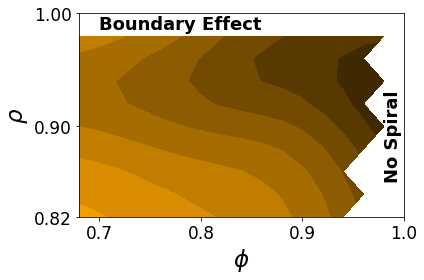

In [20]:


PHIS, RHOS= np.meshgrid( phis, rhos)
fig, ax= plt.subplots()
CS= ax.contourf(PHIS, RHOS, devs1, cmap=col_map2, vmin=1.8, vmax=3.15)
#CS= ax.contourf(PHIS, RHOS, devs1)
plt.text(0.7, 0.986, 'Boundary Effect', fontsize=18, fontweight= 'bold')
plt.text(0.98, 0.92, 'No Spiral', rotation=90, fontsize= 18, fontweight= 'bold')
#plt.text(0.85, 0.90, r'$Low$', fontsize= 18, fontweight= "bold")
#plt.text(0.62, 0.97, r'$High$', fontsize= 18, fontweight= "bold")
#plt.text(0.75, 0.85, r'$Medium$', fontsize= 18, fontweight= "bold")

#plt.xlim( [0.6, 1.02])
#plt.ylim( [0.82, 1.01] )

#cbar= fig.colorbar(CS, orientation= "horizontal")
#cbar= fig.colorbar(CS)
#cbar.set_ticks( [2, 3] )
#cbar.set_ticklabels( [r"$10^{2}$", r"$10^{3}$"] )
#cbar.set_label(r"$(T_{prediction} - T_{simulation})^{2}$", rotation= 270, size= 17)
#plt.cticks( fontsize= 17)

ax.set_xticks( [0.7, 0.8, 0.9, 1.0] )
#ax.set_xticklabels( xlabels )
ax.set_yticks( [0.82, 0.90, 1] )
plt.xticks(fontsize= 17)
plt.yticks(fontsize= 17)

#fig.colorbar( CS )
plt.xlabel(r'$\phi$', fontsize=23)
plt.ylabel(r'$\rho$', fontsize=23)
plt.tight_layout()
plt.savefig("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_T9_Spi11_Sigma2_speed_CM.png", dpi=500)

#ax.set_yticklabels( ylabels )  #xtick, xticklabels
#ax.clabel(CS, inline=1, fontsize=10)
#fig.colorbar( CS ) 

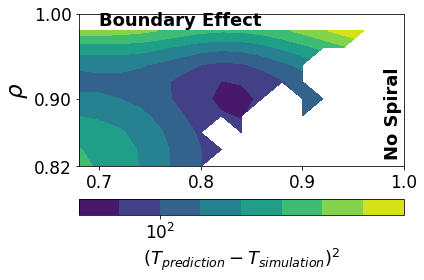

In [23]:
#contour images with horizontal colorbar
PHIS, RHOS= np.meshgrid( phis, rhos)
fig, ax= plt.subplots()
CS= ax.contourf(PHIS, RHOS, devs1)
plt.text(0.7, 0.986, 'Boundary Effect', fontsize=18, fontweight= 'bold')
plt.text(0.98, 0.92, 'No Spiral', rotation=90, fontsize= 18, fontweight= 'bold')
#plt.text(0.85, 0.90, r'$Low$', fontsize= 18, fontweight= "bold")
#plt.text(0.62, 0.97, r'$High$', fontsize= 18, fontweight= "bold")
#plt.text(0.75, 0.85, r'$Medium$', fontsize= 18, fontweight= "bold")

#plt.xlim( [0.6, 1.02])
#plt.ylim( [0.82, 1.01] )

cbar= fig.colorbar(CS, orientation= "horizontal")
cbar.set_ticks( [2, 3] )
cbar.set_ticklabels( [r"$10^{2}$", r"$10^{3}$"] )
cbar.ax.tick_params( labelsize= 17)

cbar.set_label(r"$(T_{prediction} - T_{simulation})^{2}$", rotation= 0, size= 18)
#plt.cticks( fontsize= 17)

ax.set_xticks( [0.7, 0.8, 0.9, 1.0] )
#ax.set_xticklabels( xlabels )
ax.set_yticks( [0.82, 0.90, 1] )
plt.xticks(fontsize= 17)
plt.yticks(fontsize= 17)

#plt.xlabel(r'$\phi$', fontsize=23)
plt.ylabel(r'$\rho$', fontsize=23)
plt.tight_layout()
#plt.savefig("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_Spi11_Sigma2_Phi62_colorbar.png", dpi=500)

#ax.set_yticklabels( ylabels )  #xtick, xticklabels
#ax.clabel(CS, inline=1, fontsize=10)
#fig.colorbar( CS ) 

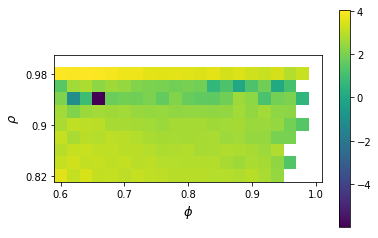

In [35]:
fig, ax= plt.subplots() #initiate fig and axis

#cs = ax1.contourf(x, y, z, hatches=['-', '/', '\\', '//'],
#                  cmap='gray', extend='both', alpha=0.5)
im= ax.imshow( devs, origin= 'lower' ) #initiate image
#im.set_clim(-2, 10)     #1. set collor limit
#fig.colorbar( im )      #1. colorbar
xs= [0, 5, 10, 15, 20]
xlabels= [ str( phis[x] ) for x in xs]

ys= [0, 4, 8]
ylabels= [ str(rhos[y]) for y in ys]
ax.set_xticks( xs )
ax.set_xticklabels( xlabels )

ax.set_yticks( ys )
ax.set_yticklabels( ylabels )  #xtick, xticklabels

ax.set_xlabel(r'$\phi$', fontsize= 13)
ax.set_ylabel(r'$\rho$', fontsize= 13)

fig.colorbar( im )

# create a legend for the contour set
#artists, labels = cs.legend_elements()
#ax2.legend(artists, labels, handleheight=2)

#plt.savefig("/home/xiaoling/SpiralWave/PapFig/Image_Dev_PhiRho_Spi11.png", dpi=500)

Text(0, 0.5, '$\\rho$')

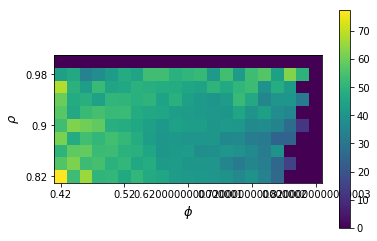

In [13]:
fig, ax= plt.subplots() #initiate fig and axis

#cs = ax1.contourf(x, y, z, hatches=['-', '/', '\\', '//'],
#                  cmap='gray', extend='both', alpha=0.5)
im= ax.imshow( periods, origin= 'lower' ) #initiate image
#im.set_clim(20, 80)     #1. set collor limit
fig.colorbar( im )      #1. colorbar
xs= [0, 5, 10, 15, 20]
xlabels= [ str( phis[x] ) for x in xs]

ys= [0, 4, 8]
ylabels= [ str(rhos[y]) for y in ys]
ax.set_xticks( xs )
ax.set_xticklabels( xlabels )

ax.set_yticks( ys )
ax.set_yticklabels( ylabels )  #xtick, xticklabels

ax.set_xlabel(r'$\phi$', fontsize= 13)
ax.set_ylabel(r'$\rho$', fontsize= 13)

# create a legend for the contour set
#artists, labels = cs.legend_elements()
#ax2.legend(artists, labels, handleheight=2)

#plt.savefig("/home/xiaoling/SpiralWave/PapFig/Image_Per_PhiRho_Spi11.png", dpi=500)

In [29]:
devs[6, :]

array([2.41868867, 2.36809403, 2.21359157, 2.53791986, 2.03799169,
       2.24917231,       -inf, 1.71725993,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf])

In [21]:
#Tau= 18

import numpy as np    
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation 
from matplotlib import cm
from numpy.random import randn
import seaborn


phis= [i/100  for i in range( 68, 101, 2 ) ]
rhos= [i/100 for i in range(82, 101, 2)]
delta=10**(-10);
tau=18
DPhi=0.02
NumRep=1000;

ColMap=np.array([ [0, 1, 0], 
                 [0, 0, 1],
                 [0, 1, 1],
                  [1, 0, 0],
                  [ 1, 0, 1],
                 [1, 1, 0]                  
                  
                 ]);


#labels=[r'$normal$',r'$\rho=0.9$',r'$\tau=18$',r'$\tau_{off}=2.5$']
#names=['Phi_Rho95Tau9.dat','Phi_Rho90Tau9.dat','Phi_Rho95Tau18.dat','Phi_Rho95Tau9Tauoff25.dat']



PhisPlot=np.arange(0.68, 1+delta, DPhi)
periods= np.zeros( (len(rhos), len(phis) ) )
periods_se= np.zeros( (len(rhos), len(phis) ) )
NumSam= np.zeros(  (len(rhos), len(phis) )  )

for irho in range( len(rhos) ):
    #If there no period is found (only one peak), period is 401
    PhiData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_PhiAct_Phi_Rho"+ str( int(rhos[irho]* 100+0.5) ) +"Tau18.dat")
    PerData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_Period_Phi_Rho"+ str( int(rhos[irho]* 100+0.5) ) +"Tau18.dat")
    PhiData=PhiData.flatten()
    PerData=PerData.flatten()

    for iphi,phi in enumerate(PhisPlot):
        PerPhi=PerData[(phi-DPhi/2 <= PhiData)*(PhiData< phi+ DPhi/2)]
        PerPhiEff=PerPhi[ (PerPhi> 0) * (PerPhi<400) ]
        if len(PerPhiEff):
            periods[irho, iphi]=np.mean(PerPhiEff);
            periods_se[irho, iphi]=np.std(PerPhiEff)/np.sqrt(len(PerPhiEff) );
            NumSam[irho, iphi]= len(PerPhiEff);
            
devs= np.zeros( (len(rhos), len(phis) ) )
for irho in range( len(rhos) ):
    for iphi in range( len(phis) ):
        rho= rhos[irho]
        phi= phis[iphi]
        if periods[irho, iphi]< 1:
            devs[irho, iphi]= -float("inf") #no spiral is found
        else:
            per_pre= 2/np.sqrt(10/2)*( 2/(1-rho)/ phi -1)
            devs[irho, iphi]= np.log10( (periods[irho, iphi]- per_pre)**2  )
            
            
#use Gaussian filter to smooth it
#1. get the weight map
#2. normalize the weight
#3. get weighted average
sigma= 2
devs1= np.zeros( (len(rhos), len(phis) ) )
for i in range( len(devs) ):
    for j in range( len(devs[0]) ):
        if devs[i,j]== -float('inf'):
            devs1[i,j]= devs[i,j]
            continue
            
        weights= np.zeros( devs.shape )
        sum_weights= 0
        for m in range( len(devs) ):
            for n in range( len(devs[0] ) ):
                if devs[m][n]> -float('inf'):
                    weights[m][n]= np.exp( -( (i-m)**2+ (j-n)**2 )/(2*sigma*sigma) )
                    sum_weights+= weights[m][n]
        weights/= sum_weights
        
        weighted_sum= 0
        for m in range( len(devs) ):
            for n in range( len(devs[0] ) ):
                if devs[m][n]> -float('inf'):
                    weighted_sum+= (weights[m,n]* devs[m,n] )
        devs1[i,j]= weighted_sum

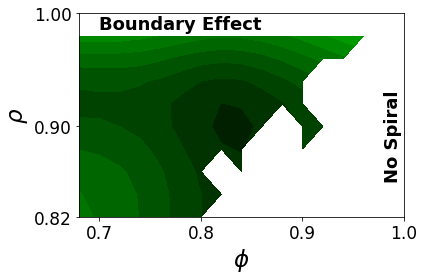

In [22]:


PHIS, RHOS= np.meshgrid( phis, rhos)
fig, ax= plt.subplots()
CS= ax.contourf(PHIS, RHOS, devs1, cmap=col_map1, vmin=1.8, vmax=3.15)
#CS= ax.contourf(PHIS, RHOS, devs1)
plt.text(0.7, 0.986, 'Boundary Effect', fontsize=18, fontweight= 'bold')
plt.text(0.98, 0.92, 'No Spiral', rotation=90, fontsize= 18, fontweight= 'bold')
#plt.text(0.85, 0.90, r'$Low$', fontsize= 18, fontweight= "bold")
#plt.text(0.62, 0.97, r'$High$', fontsize= 18, fontweight= "bold")
#plt.text(0.75, 0.85, r'$Medium$', fontsize= 18, fontweight= "bold")

#plt.xlim( [0.6, 1.02])
#plt.ylim( [0.82, 1.01] )

#cbar= fig.colorbar(CS, orientation= "horizontal")
#cbar= fig.colorbar(CS)
#cbar.set_ticks( [2, 3] )
#cbar.set_ticklabels( [r"$10^{2}$", r"$10^{3}$"] )
#cbar.set_label(r"$(T_{prediction} - T_{simulation})^{2}$", rotation= 270, size= 17)
#plt.cticks( fontsize= 17)

ax.set_xticks( [0.7, 0.8, 0.9, 1.0] )
#ax.set_xticklabels( xlabels )
ax.set_yticks( [0.82, 0.90, 1] )
plt.xticks(fontsize= 17)
plt.yticks(fontsize= 17)

#fig.colorbar( CS )
plt.xlabel(r'$\phi$', fontsize=23)
plt.ylabel(r'$\rho$', fontsize=23)
plt.tight_layout()
plt.savefig("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_T18_Spi11_Sigma2_speed_CM.png", dpi=500)

#ax.set_yticklabels( ylabels )  #xtick, xticklabels
#ax.clabel(CS, inline=1, fontsize=10)
#fig.colorbar( CS ) 

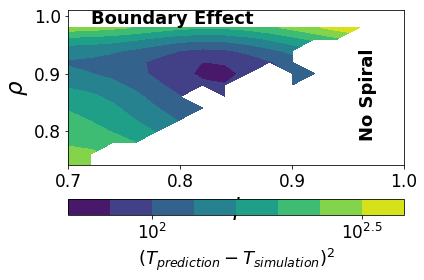

In [51]:
PHIS, RHOS= np.meshgrid( phis, rhos)
fig, ax= plt.subplots()
CS= ax.contourf(PHIS, RHOS, devs1)
plt.text(0.72, 0.986, 'Boundary Effect', fontsize=18, fontweight= 'bold')
plt.text(0.96, 0.92, 'No Spiral', rotation=90, fontsize= 18, fontweight= 'bold')
#plt.text(0.85, 0.90, r'$Low$', fontsize= 18, fontweight= "bold")
#plt.text(0.62, 0.97, r'$High$', fontsize= 18, fontweight= "bold")
#plt.text(0.75, 0.85, r'$Medium$', fontsize= 18, fontweight= "bold")

#plt.xlim( [0.6, 1.02])
plt.ylim( [0.74, 1.01] )

#cbar= fig.colorbar(CS, orientation= "horizontal")
#cbar= fig.colorbar(CS)
#cbar.set_ticks( [2, 3] )
#cbar.set_ticklabels( [r"$10^{2}$", r"$10^{3}$"] )
#cbar.set_label(r"$(T_{prediction} - T_{simulation})^{2}$", rotation= 270, size= 17)
#plt.cticks( fontsize= 17)

ax.set_xticks( [0.7, 0.8, 0.9, 1.0] )
#ax.set_xticklabels( xlabels )
ax.set_yticks( [0.80, 0.90, 1] )
plt.xticks(fontsize= 17)
plt.yticks(fontsize= 17)

cbar= fig.colorbar(CS, orientation= "horizontal")
cbar.set_ticks( [2, 2.5] )
cbar.set_ticklabels( [r"$10^{2}$", r"$10^{2.5}$"] )
cbar.ax.tick_params( labelsize= 17)
cbar.set_label(r"$(T_{prediction} - T_{simulation})^{2}$", rotation= 0, size= 18)

#fig.colorbar( CS )
plt.xlabel(r'$\phi$', fontsize=23)
plt.ylabel(r'$\rho$', fontsize=23)
plt.tight_layout()
plt.savefig("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_Spi11_Sigma2_tau18_CB.png", dpi=500)

#ax.set_yticklabels( ylabels )  #xtick, xticklabels
#ax.clabel(CS, inline=1, fontsize=10)
#fig.colorbar( CS ) 

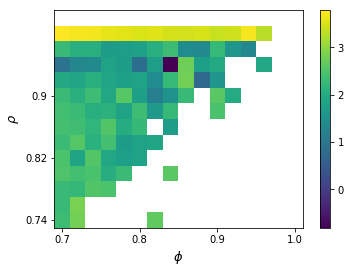

In [41]:
fig, ax= plt.subplots() #initiate fig and axis

#cs = ax1.contourf(x, y, z, hatches=['-', '/', '\\', '//'],
#                  cmap='gray', extend='both', alpha=0.5)
im= ax.imshow( devs, origin= 'lower' ) #initiate image
#im.set_clim(-2, 10)     #1. set collor limit
#fig.colorbar( im )      #1. colorbar
xs= [0, 5, 10, 15]
xlabels= [ str( phis[x] ) for x in xs]

ys= [0, 4, 8]
ylabels= [ str(rhos[y]) for y in ys]
ax.set_xticks( xs )
ax.set_xticklabels( xlabels )

ax.set_yticks( ys )
ax.set_yticklabels( ylabels )  #xtick, xticklabels

ax.set_xlabel(r'$\phi$', fontsize= 13)
ax.set_ylabel(r'$\rho$', fontsize= 13)

fig.colorbar( im )

# create a legend for the contour set
#artists, labels = cs.legend_elements()
#ax2.legend(artists, labels, handleheight=2)

#plt.savefig("/home/xiaoling/SpiralWave/PapFig/Image_Dev_PhiRho_Spi11.png", dpi=500)

In [25]:
#convert figure 5F, 5G, trace to cyan
import cv2
names=["HM_Dev-PhiActRho_T9_Spi11_Sigma2_speed_CM.png", "HM_Dev-PhiActRho_T18_Spi11_Sigma2_speed_CM.png"]
image_T9 = cv2.imread("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_T9_Spi11_Sigma2_speed_CM.png", 1  ) #Opencv always (AFAIK) uses BGR channel order
image_T18 = cv2.imread("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_T18_Spi11_Sigma2_speed_CM.png", 1  )
#image = cv2.resize(image, (1839, 1523) )

H= len(image_T9) 
W=  len(image_T9[0]) 

slope= -(W-1)/(H-1)
slope*= 1.08
intercept= W- 1
intercept*= 0.95
for i in range( H ):
    for j in range( W ):
        if j< slope*i + intercept:
            image_T9[i,j, :]= image_T18[i,j, :]
cv2.imwrite("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_T9-18_Spi11_Sigma2_speed_CM.png", image_T9)

True

In [42]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 12)
print(viridis)

In [44]:
print('viridis.colors', viridis.colors)
print('viridis(range(12))', viridis(range(12)))
print('viridis(np.linspace(0, 1, 12))', viridis(np.linspace(0, 1, 12)))

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(range(12)) [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(np.linspace(0, 1, 12

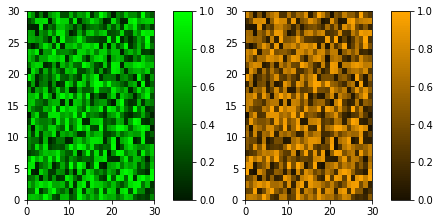

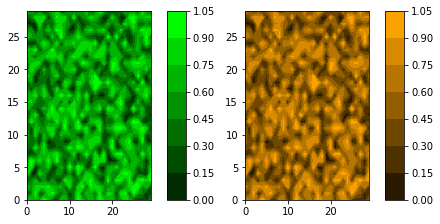

In [72]:
col_vec1= np.zeros( (100, 4) )
col_vec1[:, 1]= np.linspace(0.1, 1, 100)
col_vec1[:, 3]= 1

col_vec2= np.zeros( (100, 4) )
col_vec2[:, 0]= np.linspace(0.1, 1, 100)
col_vec2[:, 1]= col_vec2[:, 0]*165/255
col_vec2[:, 3]= 1

col_map1 = ListedColormap(col_vec1)
col_map2 = ListedColormap(col_vec2)
cms=[ col_map1, col_map2]

np.random.seed(19680801)
data = np.random.rand(30, 30)

fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
for [ax, cmap] in zip(axs, cms):
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=1)
    fig.colorbar(psm, ax=ax)
plt.show()


np.random.seed(19680801)
data = np.random.rand(30, 30)

fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
for [ax, cmap] in zip(axs, cms):
    psm = ax.contourf(data, cmap=cmap, vmin=0, vmax=1)
    fig.colorbar(psm, ax=ax)
plt.show()

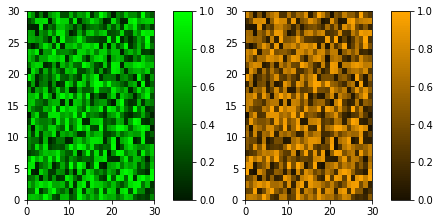

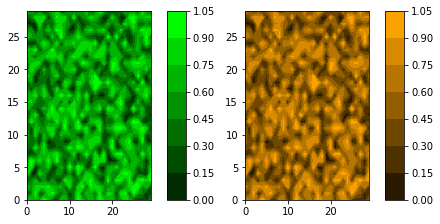